# Imports

In [11]:
# data manipulation
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import math

# visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data

In [12]:
train_data_V = pd.DataFrame()

train_data_V['hysteresis'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/hysteresis_all_scaled_train.csv')['total']
train_data_V['id'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/idiq_all_scaled_train.csv')['id']
train_data_V['iq'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/idiq_all_scaled_train.csv')['iq']
train_data_V['joule'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/joule_all_scaled_train.csv')['total']
train_data_V['speed'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/speed_all_scaled_train.csv')['N']
train_data_V['d1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_train.csv')['d1']
train_data_V['d2'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_train.csv')['d2']
train_data_V['d3'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_train.csv')['d3']
train_data_V['r1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_train.csv')['r1']
train_data_V['t1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_train.csv')['t1']

In [13]:
test_data_V = pd.DataFrame()

test_data_V['hysteresis'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/hysteresis_all_scaled_test.csv')['total']
test_data_V['id'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/idiq_all_scaled_test.csv')['id']
test_data_V['iq'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/idiq_all_scaled_test.csv')['iq']
test_data_V['joule'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/joule_all_scaled_test.csv')['total']
test_data_V['speed'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/speed_all_scaled_test.csv')['N']
test_data_V['d1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_test.csv')['d1']
test_data_V['d2'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_test.csv')['d2']
test_data_V['d3'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_test.csv')['d3']
test_data_V['r1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_test.csv')['r1']
test_data_V['t1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_test.csv')['t1']

# Defining important functions

In [14]:
def combinedHist (name, y_test, prediction, binss = 100):
    fig = plt.figure(figsize = (6, 6))
    grid = plt.GridSpec(4, 4, hspace = 0.2, wspace = 0.4)

    main_ax = fig.add_subplot(grid[:-1, 1:])

    y_hist = fig.add_subplot(grid[:-1, 0],
                            xticklabels = [],
                            sharey = main_ax)
    x_hist = fig.add_subplot(grid[-1, 1:],
                            yticklabels = [],
                            sharex = main_ax)

    main_ax.hist2d(y_test, prediction,
                bins = binss, cmap = 'Blues')

    x_hist.hist(y_test, histtype = 'stepfilled', bins = binss,
                orientation = 'vertical', color = 'green', alpha = 0.3)
    x_hist.invert_yaxis()

    y_hist.hist(prediction, histtype = 'stepfilled', bins = binss,
                orientation = 'horizontal', color = 'green', alpha = 0.3)
    y_hist.invert_xaxis()

    fig.suptitle("{} - Test and Prediction Comparison".format(name), size = 18)

In [15]:
def hist2d (name, y_test, prediction, binss = 100):
    plt.hist2d(y_test, prediction, bins = binss)

    plt.title('{} - y_test and prediction'.format(name))

    plt.colorbar()

    plt.xlabel('y_test')
    plt.ylabel('prediction')

In [16]:
def IQR_outliers_removal (dataset, variable):
    q1 = dataset[variable].quantile(0.25)
    q3 = dataset[variable].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    
    outliers = list(dataset[variable][(dataset[variable] > upper_limit) | (dataset[variable] < lower_limit)].index)
    dataset = dataset.drop(outliers)
    return dataset

# Dataset before cleaning

In [17]:
train_data_V.isnull().sum()

hysteresis    0
id            0
iq            0
joule         0
speed         0
d1            0
d2            0
d3            0
r1            0
t1            0
dtype: int64

Text(0.5, 1.0, 'Train dataset before cleaning')

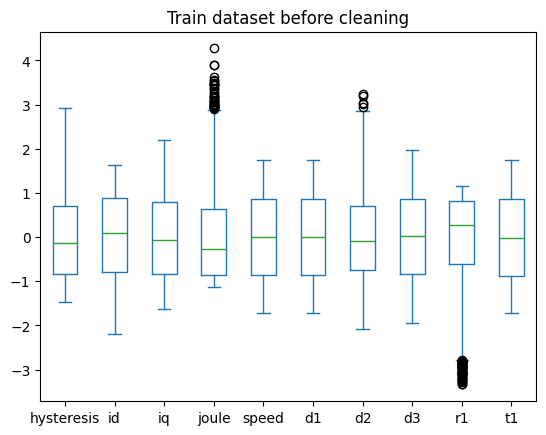

In [18]:
test_data_V.plot(kind = 'box')
plt.title('Train dataset before cleaning')

Text(0.5, 1.0, 'Train dataset before cleaning')

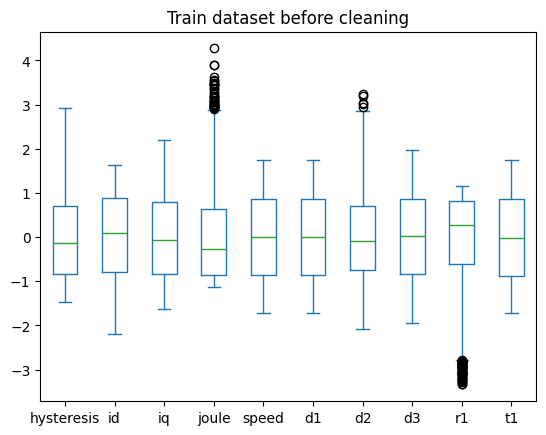

In [19]:
test_data_V.plot(kind = 'box')
plt.title('Train dataset before cleaning')

In [20]:
print(f"Train dataset size before clean: {len(train_data_V)}")
print(f"Test dataset size before clean: {len(test_data_V)}")

Train dataset size before clean: 23783
Test dataset size before clean: 4756


# Cleaning dataset

After some code analysis through box plots, I found out that the following features had plenty of outliers, so I removed them via IQR method.

In [21]:
train_data_V = IQR_outliers_removal(train_data_V, 'joule')
train_data_V = IQR_outliers_removal(train_data_V, 'd2')
train_data_V = IQR_outliers_removal(train_data_V, 'r1')

In [22]:
test_data_V = IQR_outliers_removal(test_data_V, 'joule')
test_data_V = IQR_outliers_removal(test_data_V, 'd2')
test_data_V = IQR_outliers_removal(test_data_V, 'r1')

Plotting for better visualization:

Text(0.5, 1.0, 'Train dataset after cleaning')

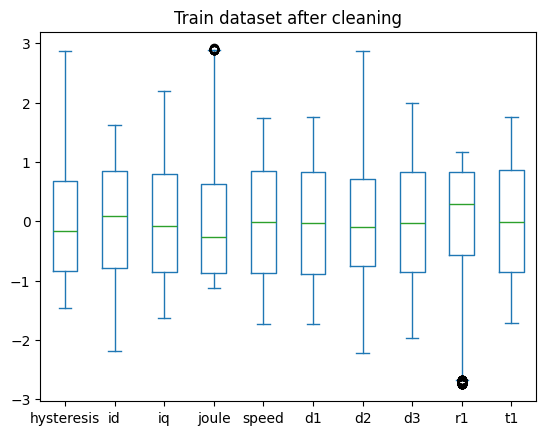

In [23]:
train_data_V.plot(kind = 'box')
plt.title('Train dataset after cleaning')

Text(0.5, 1.0, 'Test dataset after cleaning')

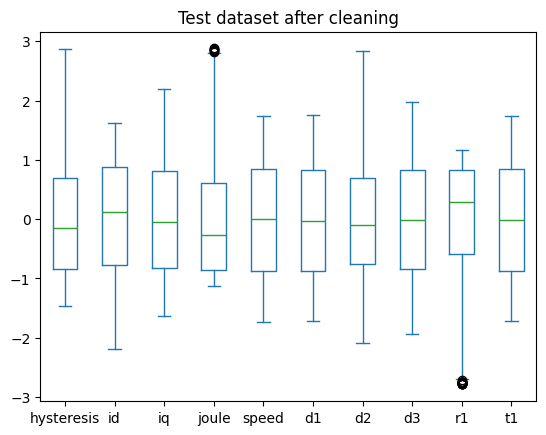

In [24]:
test_data_V.plot(kind = 'box')
plt.title('Test dataset after cleaning')

In [25]:
print(f"Train dataset size after clean: {len(train_data_V)}")
print(f"Test dataset size after clean: {len(test_data_V)}")

Train dataset size after clean: 23378
Test dataset size after clean: 4662


# Creating a model

Setting X and y 

In [45]:
variable = 'speed'

X_train = train_data_V.drop(columns=variable)
y_train = train_data_V[variable]
X_test = test_data_V.drop(columns=variable)
y_test = test_data_V[variable]

Creating and fitting model and making predictions

In [46]:
model_V = RandomForestRegressor(oob_score = True)
model_V.fit(X_train, y_train)
predictions = model_V.predict(X_test)

# Results

In [47]:
print(f"Score: {r2_score(y_test, predictions)}")
print(f"Mean squared error: {mean_squared_error(y_test, predictions)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, predictions)}")

Score: 0.9919989147383907
Mean squared error: 0.007932218287575522
MAPE: 0.7403076377619747


Text(0.5, 1.0, 'speed: Test and Model Prediction')

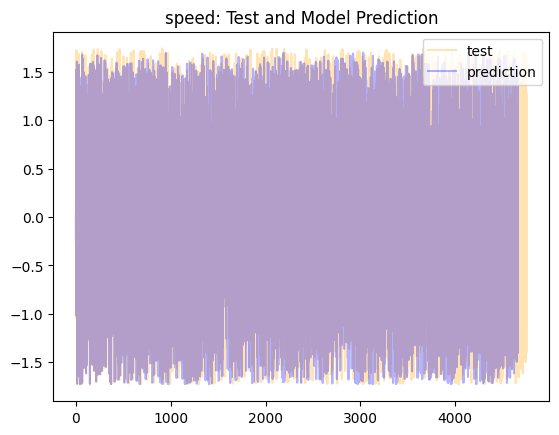

In [48]:
plt.plot(y_test, alpha = 0.3, color = 'orange', label = 'test')
plt.plot(predictions, alpha = 0.3, color = 'blue', label = 'prediction')
plt.legend()
plt.title(f"{variable}: Test and Model Prediction")

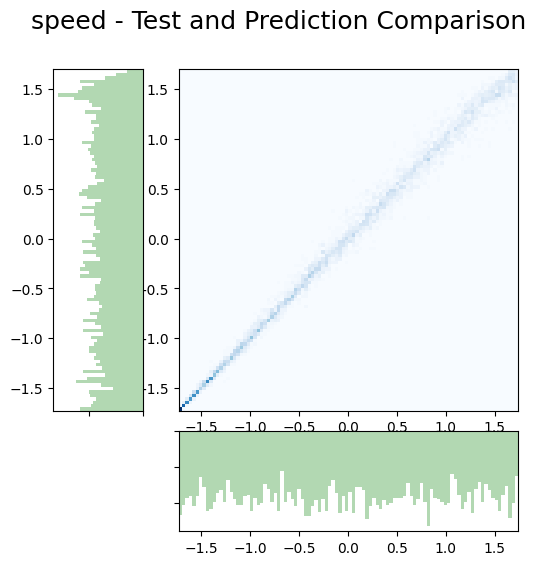

In [49]:
combinedHist(variable, y_test, predictions)

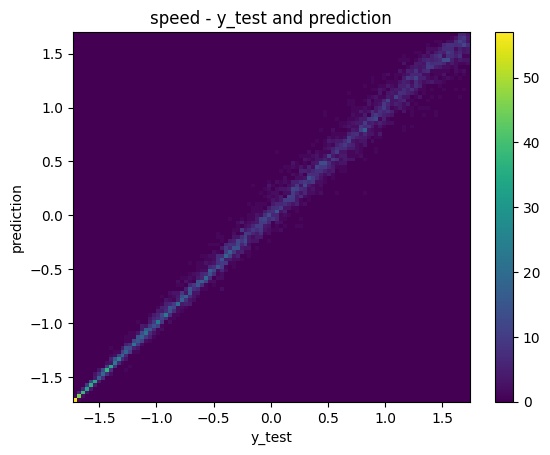

In [50]:
hist2d(variable, y_test, predictions)

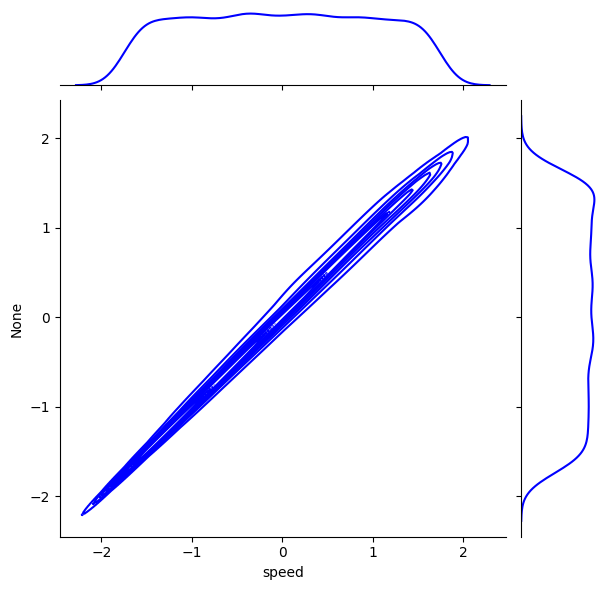

In [51]:
sns.jointplot(x = y_test, y = predictions, kind = 'kde', color = 'blue')

Text(0.5, 1.0, 'Importance of features for speed prediction')

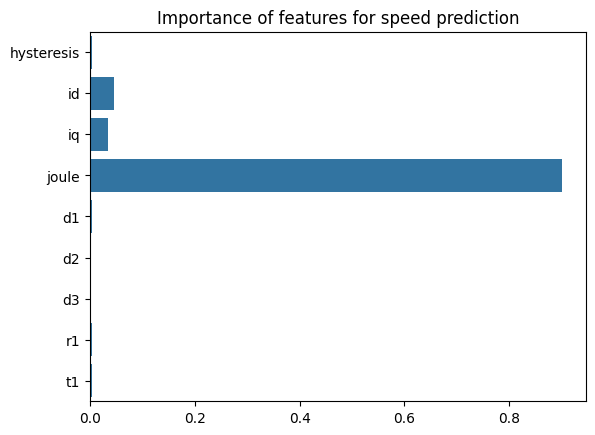

In [52]:
sns.barplot(x = model_V.feature_importances_, y = model_V.feature_names_in_)
plt.title(f"Importance of features for {variable} prediction")